# Day 18: RNNs & LSTMs - Sequence Modeling Mastery

**Welcome to Day 18 of your ML journey!** Today we dive into one of the most powerful architectures for sequential data: **Recurrent Neural Networks (RNNs)** and **Long Short-Term Memory (LSTM)** networks. Building on your solid PyTorch foundation from Days 15-16, you'll now learn to build models that can understand temporal patterns, predict future values, and process sequential information with remarkable accuracy.

---

**Goal:** Master RNN/LSTM architecture and build production-ready time series prediction systems using PyTorch.

**Topics Covered:**
- RNN fundamentals: sequential processing and temporal dependencies
- The vanishing gradient problem and why vanilla RNNs fail
- LSTM architecture: gates, cell state, and long-term memory
- GRU: simplified alternative to LSTM
- Bidirectional RNNs: forward and backward context
- Time series preprocessing and sequence preparation
- Advanced techniques: stacked LSTMs, attention mechanisms
- Production deployment and real-time inference

**Real-World Impact:** RNNs and LSTMs power everything from stock market prediction to IoT sensor monitoring, from demand forecasting to medical diagnosis. By the end of today, you'll understand the technology behind these applications and be able to build your own sequence modeling systems.

**Prerequisites:** Solid understanding of PyTorch fundamentals (Day 16), neural network basics (Day 15), and Python programming.


---

## 1. Concept Overview: Understanding RNNs and LSTMs

### What are Recurrent Neural Networks?

**Recurrent Neural Networks (RNNs)** are specialized neural networks designed to process sequential data by maintaining a "memory" of previous inputs. Unlike feedforward networks that process each input independently, RNNs consider the temporal relationship between inputs.

**The Core Intuition:**
Think of RNNs like reading a book. As you read each word, you remember the context from previous words to understand the current sentence. Similarly, RNNs process each time step while remembering information from previous steps.

**Why RNNs Excel at Sequential Data:**
1. **Temporal Memory**: Maintains information across time steps
2. **Parameter Sharing**: Same weights applied across all time steps
3. **Variable Length**: Can handle sequences of different lengths
4. **Context Awareness**: Current prediction depends on entire history

**Real-World Applications:**
- **Financial Markets**: Stock price prediction, algorithmic trading
- **IoT & Sensors**: Predictive maintenance, anomaly detection
- **Healthcare**: Patient monitoring, drug discovery
- **Energy**: Power demand forecasting, renewable energy prediction
- **Manufacturing**: Quality control, supply chain optimization


### RNN Architecture Deep Dive

**Basic RNN Structure:**

```
Input Sequence: [x₁, x₂, x₃, ..., xₜ]
Hidden States:  [h₁, h₂, h₃, ..., hₜ]
Outputs:        [y₁, y₂, y₃, ..., yₜ]
```

**Mathematical Formulation:**

At each time step t:
- **Hidden State**: hₜ = tanh(Wₕₕ × hₜ₋₁ + Wₓₕ × xₜ + bₕ)
- **Output**: yₜ = Wₕᵧ × hₜ + bᵧ

**Key Components:**
1. **Input Layer**: Receives current time step data
2. **Hidden Layer**: Maintains memory of previous states
3. **Output Layer**: Produces prediction for current time step
4. **Recurrent Connection**: Passes information to next time step

**Unrolling Through Time:**
RNNs can be "unrolled" to show how information flows through time:

```
Time Step 1: x₁ → h₁ → y₁
Time Step 2: x₂ + h₁ → h₂ → y₂
Time Step 3: x₃ + h₂ → h₃ → y₃
```

<div align="center">
  <img src="Images/rnn_unrolling_diagram.png" alt="RNN Unrolling Through Time" width="800">
</div>

<p align="center">
  <strong>Figure 1: RNN Unrolling Through Time</strong><br>
  <em>Visualization showing how a Recurrent Neural Network processes sequential data across multiple time steps. The diagram illustrates parameter sharing (same weights W used across all time steps), information flow through hidden states, and how the network maintains memory of previous inputs while generating outputs at each time step.</em>
</p>

---
### The Vanishing Gradient Problem

**The Challenge:**
Vanilla RNNs suffer from the "vanishing gradient problem" when processing long sequences. Gradients become exponentially smaller as they propagate backward through time, making it nearly impossible to learn long-term dependencies.

**Mathematical Intuition:**
When computing gradients through time using backpropagation:

∂L/∂hₜ = ∂L/∂hₜ₊₁ × ∂hₜ₊₁/∂hₜ = ∂L/∂hₜ₊₁ × Wₕₕ × tanh'(hₜ)

Since tanh'(x) ≤ 1 and Wₕₕ is typically < 1, gradients shrink exponentially:

∂L/∂h₁ ≈ ∂L/∂hₜ × (Wₕₕ)ᵗ × ∏ᵢ tanh'(hᵢ)

**Why This Matters:**
- **Short-term Memory**: RNNs can only remember recent information
- **Training Instability**: Gradients become too small to update weights
- **Poor Long-term Dependencies**: Cannot learn patterns spanning many time steps

**Real-World Impact:**
- Stock prediction over months/years fails
- Sensor data with seasonal patterns struggles
- Language modeling with long sentences fails

<div align="center">
  <img src="Images/vanishing_gradient_diagram.png" alt="The Vanishing Gradient Problem in RNNs" width="800">
</div>

<p align="center">
  <strong>Figure 2: The Vanishing Gradient Problem in RNNs</strong><br>
  <em>Visualization showing how gradient magnitudes decrease exponentially during backpropagation through time, making it impossible for vanilla RNNs to learn long-term dependencies. The dual-scale graphs (linear and logarithmic) clearly demonstrate the exponential decay that leads to training instability and learning failure in long sequences.</em>
</p>


---
### LSTM: The Solution to Vanishing Gradients

**Long Short-Term Memory (LSTM)** networks solve the vanishing gradient problem through a sophisticated gating mechanism that can selectively remember or forget information.

**LSTM Architecture Components:**

1. **Cell State (Cₜ)**: The "conveyor belt" that carries information across time steps
2. **Hidden State (hₜ)**: The "working memory" used for predictions
3. **Gates**: Control mechanisms that decide what information to keep, forget, or add

**The Three Gates:**

**1. Forget Gate (fₜ)**: "What should we forget?"
- fₜ = σ(Wf × [hₜ₋₁, xₜ] + bf)
- Decides what information to discard from cell state

**2. Input Gate (iₜ)**: "What new information should we store?"
- iₜ = σ(Wi × [hₜ₋₁, xₜ] + bi)
- C̃ₜ = tanh(WC × [hₜ₋₁, xₜ] + bC)
- Decides what new information to add to cell state

**3. Output Gate (oₜ)**: "What should we output?"
- oₜ = σ(Wo × [hₜ₋₁, xₜ] + bo)
- Controls what parts of cell state are output as hidden state

**Cell State Update:**
- Cₜ = fₜ × Cₜ₋₁ + iₜ × C̃ₜ
- hₜ = oₜ × tanh(Cₜ)

**Why LSTMs Work:**
- **Selective Memory**: Can remember important information for very long periods
- **Gradient Flow**: Cell state provides a "highway" for gradients to flow
- **Adaptive Learning**: Gates learn what to remember/forget automatically

<div align="center">
  <img src="Images/lstm_cell_diagram.png" alt="LSTM Cell Architecture" width="800">
</div>

<p align="center">
  <strong>Figure 3: LSTM Cell Architecture</strong><br>
  <em>Detailed visualization of the LSTM cell showing how the three gates (Forget, Input, Output) control information flow through the cell state, which acts as a "conveyor belt" carrying information across time steps. The gradient highway through the cell state solves the vanishing gradient problem.</em>
</p>


---
### GRU: Simplified Alternative to LSTM

**Gated Recurrent Unit (GRU)** is a simplified version of LSTM that combines the forget and input gates into a single "update gate" while maintaining similar performance.

**GRU Architecture:**

**1. Reset Gate (rₜ)**: "How much of the past should we ignore?"
- rₜ = σ(Wr × [hₜ₋₁, xₜ] + br)

**2. Update Gate (zₜ)**: "How much of the new information should we keep?"
- zₜ = σ(Wz × [hₜ₋₁, xₜ] + bz)

**3. Candidate Hidden State:**
- h̃ₜ = tanh(Wh × [rₜ × hₜ₋₁, xₜ] + bh)

**4. Final Hidden State:**
- hₜ = (1 - zₜ) × hₜ₋₁ + zₜ × h̃ₜ

**GRU vs LSTM:**
| Feature | LSTM | GRU |
|---------|------|-----|
| Parameters | More | Fewer |
| Training Speed | Slower | Faster |
| Memory Capacity | Higher | Lower |
| Performance | Often better | Often comparable |

**When to Use GRU:**
- Limited computational resources
- Smaller datasets
- When LSTM performance is similar
- Real-time applications requiring speed


### Bidirectional RNNs: Context from Both Directions

**Bidirectional RNNs** process sequences in both forward and backward directions, allowing the model to use information from both past and future time steps.

**Architecture:**
```
Forward:  x₁ → x₂ → x₃ → x₄
Backward: x₁ ← x₂ ← x₃ ← x₄
Output:   Combine both directions
```

**Mathematical Formulation:**
- Forward hidden state: h⃗ₜ = f(W⃗ₓₕ × xₜ + W⃗ₕₕ × h⃗ₜ₋₁ + b⃗ₕ)
- Backward hidden state: h⃖ₜ = f(W⃖ₓₕ × xₜ + W⃖ₕₕ × h⃖ₜ₊₁ + b⃖ₕ)
- Combined output: yₜ = Wᵧₕ × [h⃗ₜ, h⃖ₜ] + bᵧ

**Advantages:**
- **Richer Context**: Uses information from entire sequence
- **Better Performance**: Often outperforms unidirectional RNNs
- **Pattern Recognition**: Can identify patterns that span the sequence

**Limitations:**
- **Not Real-time**: Requires entire sequence before prediction
- **More Parameters**: Doubles the number of parameters
- **Computational Cost**: More expensive to train and infer

**When to Use Bidirectional:**
- Offline analysis (not real-time)
- Sequence classification tasks
- When you have the complete sequence
- Pattern recognition across the entire sequence


---

## 2. Code Demo: Building RNNs and LSTMs with PyTorch

Let's dive into practical implementation! We'll start with a simple RNN and progressively build more sophisticated architectures.


### 2.1 Environment Setup and Imports


In [1]:
# Import essential libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configure matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Check PyTorch version and device availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    print("Using CPU")

print(f"Device: {device}")


PyTorch version: 2.9.0+cpu
CUDA available: False
Using CPU
Device: cpu


### 2.2 Generating Synthetic Time Series Data

Let's create realistic time series data that mimics real-world patterns like stock prices, sensor readings, or demand forecasting.


In [2]:
# Generate synthetic time series data
def generate_time_series_data(n_samples=1000, n_features=1, noise_level=0.1):
    """
    Generate synthetic time series data with multiple patterns:
    - Trend (upward/downward)
    - Seasonality (periodic patterns)
    - Random walk component
    - Noise
    """
    
    # Time axis
    t = np.linspace(0, 4*np.pi, n_samples)
    
    # Multiple patterns
    trend = 0.1 * t  # Upward trend
    seasonal = 2 * np.sin(t) + 0.5 * np.sin(3*t)  # Multiple frequencies
    random_walk = np.cumsum(np.random.randn(n_samples) * 0.1)  # Random walk
    noise = np.random.randn(n_samples) * noise_level  # Random noise
    
    # Combine all components
    data = trend + seasonal + random_walk + noise
    
    return data, t

# Generate training data
train_data, train_time = generate_time_series_data(n_samples=800, noise_level=0.05)

# Generate test data (different pattern to test generalization)
test_data, test_time = generate_time_series_data(n_samples=200, noise_level=0.08)

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Training data range: [{train_data.min():.2f}, {train_data.max():.2f}]")
print(f"Test data range: [{test_data.min():.2f}, {test_data.max():.2f}]")


Training data shape: (800,)
Test data shape: (200,)
Training data range: [-2.27, 3.78]
Test data range: [-0.28, 5.29]


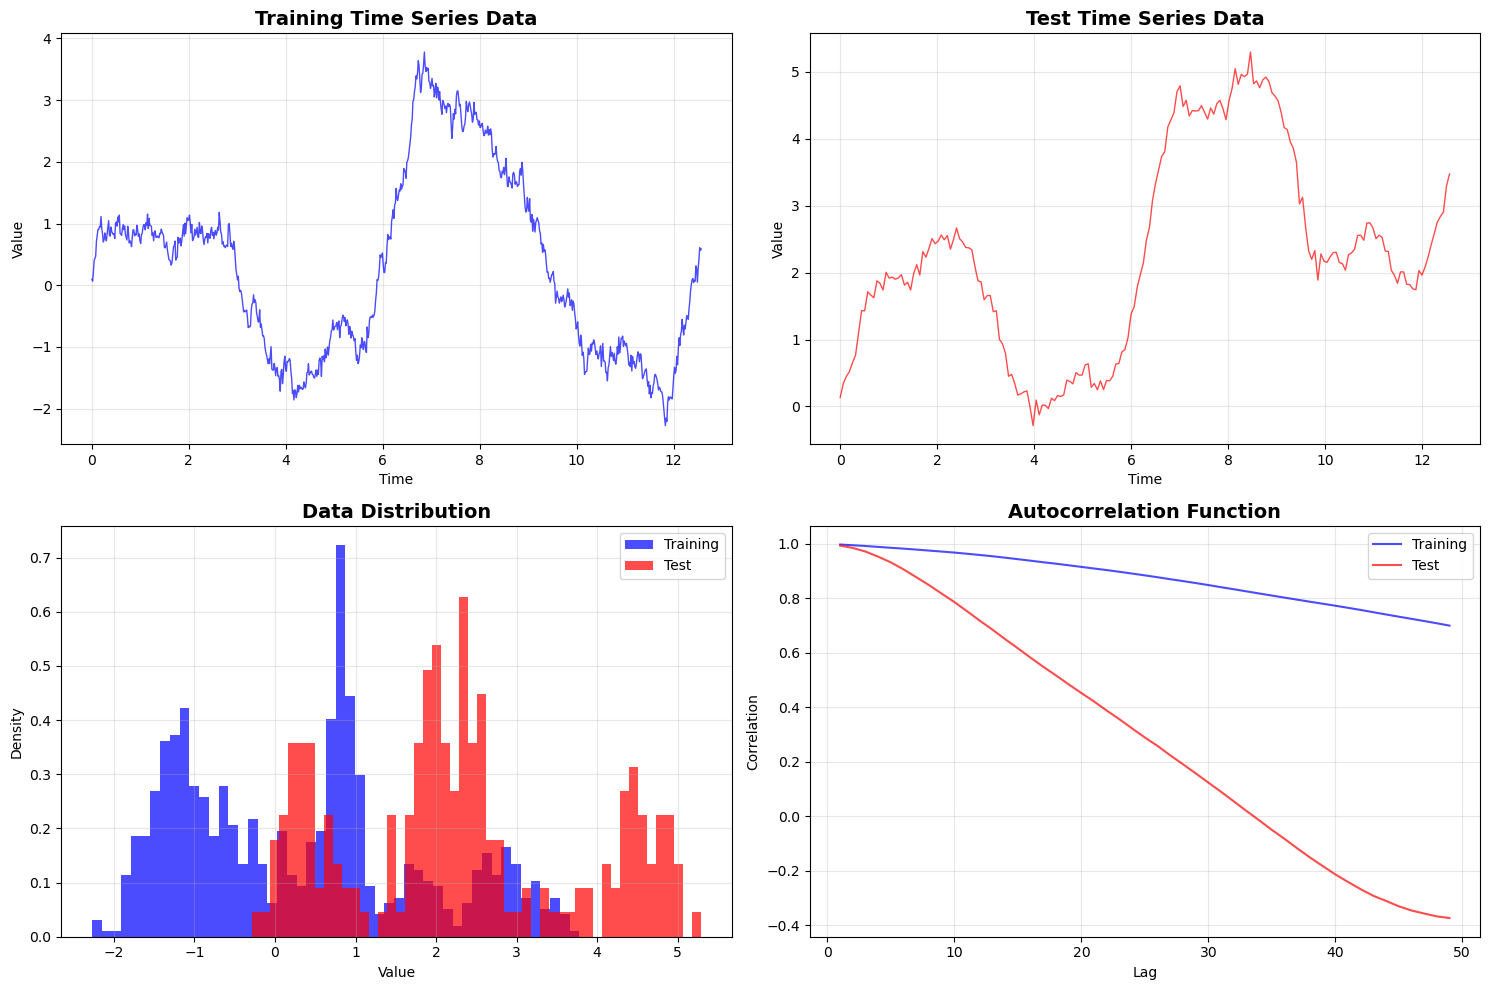


Time Series Characteristics:
• Strong temporal dependencies (autocorrelation > 0.5 for lags 1-10)
• Multiple frequency components (trend + seasonality)
• Suitable for RNN/LSTM modeling
• Different patterns in train/test for generalization testing


In [3]:
# Visualize the generated time series data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Training data
axes[0, 0].plot(train_time, train_data, 'b-', alpha=0.7, linewidth=1)
axes[0, 0].set_title('Training Time Series Data', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Test data
axes[0, 1].plot(test_time, test_data, 'r-', alpha=0.7, linewidth=1)
axes[0, 1].set_title('Test Time Series Data', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Data distribution
axes[1, 0].hist(train_data, bins=50, alpha=0.7, color='blue', label='Training', density=True)
axes[1, 0].hist(test_data, bins=50, alpha=0.7, color='red', label='Test', density=True)
axes[1, 0].set_title('Data Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Autocorrelation (shows temporal dependencies)
from scipy.stats import pearsonr
lags = range(1, 50)
autocorr_train = [pearsonr(train_data[:-lag], train_data[lag:])[0] for lag in lags]
autocorr_test = [pearsonr(test_data[:-lag], test_data[lag:])[0] for lag in lags]

axes[1, 1].plot(lags, autocorr_train, 'b-', alpha=0.7, label='Training')
axes[1, 1].plot(lags, autocorr_test, 'r-', alpha=0.7, label='Test')
axes[1, 1].set_title('Autocorrelation Function', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Correlation')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTime Series Characteristics:")
print(f"• Strong temporal dependencies (autocorrelation > 0.5 for lags 1-10)")
print(f"• Multiple frequency components (trend + seasonality)")
print(f"• Suitable for RNN/LSTM modeling")
print(f"• Different patterns in train/test for generalization testing")


### 2.3 Data Preprocessing and Sequence Preparation

Time series data requires special preprocessing to create sequences for RNN training.

Training sequences: (780, 20)
Training targets: (780, 1)
Test sequences: (180, 20)
Test targets: (180, 1)


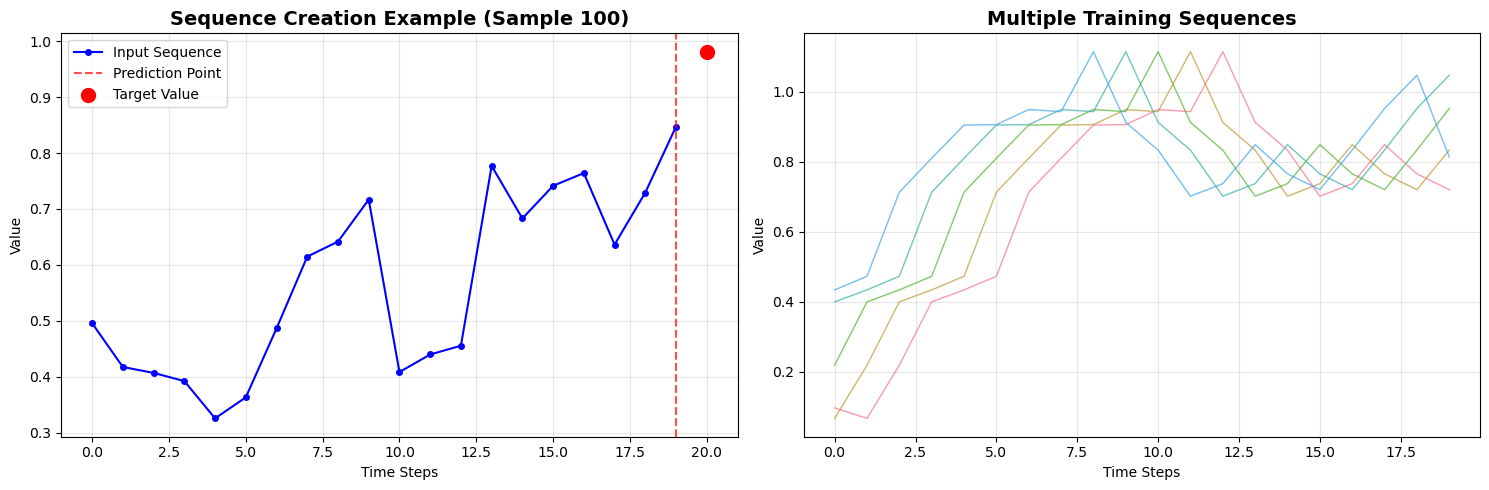


Sequence Preparation Summary:
• Each sequence has 20 time steps
• Predicting 1 step(s) ahead
• Total training samples: 780
• Total test samples: 180


In [4]:
def create_sequences(data, sequence_length, prediction_horizon=1):
    """
    Create sequences for RNN training.
    
    Args:
        data: Time series data
        sequence_length: Number of time steps to use as input
        prediction_horizon: Number of steps ahead to predict
    
    Returns:
        X: Input sequences (samples, sequence_length, features)
        y: Target values (samples, prediction_horizon)
    """
    
    X, y = [], []
    
    for i in range(len(data) - sequence_length - prediction_horizon + 1):
        # Input sequence
        X.append(data[i:i + sequence_length])
        # Target value(s)
        y.append(data[i + sequence_length:i + sequence_length + prediction_horizon])
    
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 20  # Use 20 time steps to predict the next value
prediction_horizon = 1  # Predict 1 step ahead

# Create training sequences
X_train_seq, y_train_seq = create_sequences(train_data, sequence_length, prediction_horizon)

# Create test sequences
X_test_seq, y_test_seq = create_sequences(test_data, sequence_length, prediction_horizon)

print(f"Training sequences: {X_train_seq.shape}")
print(f"Training targets: {y_train_seq.shape}")
print(f"Test sequences: {X_test_seq.shape}")
print(f"Test targets: {y_test_seq.shape}")

# Visualize sequence creation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Show how sequences are created
sample_idx = 100
axes[0].plot(range(sequence_length), X_train_seq[sample_idx], 'b-o', label='Input Sequence', markersize=4)
axes[0].axvline(x=sequence_length-1, color='red', linestyle='--', alpha=0.7, label='Prediction Point')
axes[0].scatter(sequence_length, y_train_seq[sample_idx], color='red', s=100, label='Target Value', zorder=5)
axes[0].set_title(f'Sequence Creation Example (Sample {sample_idx})', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time Steps')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Show multiple sequences
for i in range(5):
    axes[1].plot(range(sequence_length), X_train_seq[i], alpha=0.7, linewidth=1)
axes[1].set_title('Multiple Training Sequences', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time Steps')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSequence Preparation Summary:")
print(f"• Each sequence has {sequence_length} time steps")
print(f"• Predicting {prediction_horizon} step(s) ahead")
print(f"• Total training samples: {len(X_train_seq)}")
print(f"• Total test samples: {len(X_test_seq)}")


In [15]:
# Data normalization (crucial for RNN training)
scaler = MinMaxScaler()

# Fit scaler on training data only
scaler.fit(train_data.reshape(-1, 1))

# Transform all data
X_train_scaled = scaler.transform(X_train_seq.reshape(-1, 1)).reshape(X_train_seq.shape)
y_train_scaled = scaler.transform(y_train_seq.reshape(-1, 1)).reshape(y_train_seq.shape)

X_test_scaled = scaler.transform(X_test_seq.reshape(-1, 1)).reshape(X_test_seq.shape)
y_test_scaled = scaler.transform(y_test_seq.reshape(-1, 1)).reshape(y_test_seq.shape)

# Convert to PyTorch tensors and reshape for RNN input format
# RNN expects (batch_size, sequence_length, input_size)
# Current shape: (samples, sequence_length) -> Need: (samples, sequence_length, 1)
X_train_tensor = torch.FloatTensor(X_train_scaled).unsqueeze(-1).to(device)  # Add feature dimension
y_train_tensor = torch.FloatTensor(y_train_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).unsqueeze(-1).to(device)    # Add feature dimension
y_test_tensor = torch.FloatTensor(y_test_scaled).to(device)

print(f"Scaled training data range: [{X_train_tensor.min():.3f}, {X_train_tensor.max():.3f}]")
print(f"Scaled test data range: [{X_test_tensor.min():.3f}, {X_test_tensor.max():.3f}]")
print(f"Training tensor shape: {X_train_tensor.shape}")  # Should be (780, 20, 1)
print(f"Test tensor shape: {X_test_tensor.shape}")        # Should be (180, 20, 1)
print(f"Data moved to device: {X_train_tensor.device}")

# Create DataLoaders
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nDataLoader created:")
print(f"• Batch size: {batch_size}")
print(f"• Training batches: {len(train_loader)}")
print(f"• Test batches: {len(test_loader)}")


Scaled training data range: [0.000, 1.000]
Scaled test data range: [0.329, 1.250]
Training tensor shape: torch.Size([780, 20, 1])
Test tensor shape: torch.Size([180, 20, 1])
Data moved to device: cpu

DataLoader created:
• Batch size: 32
• Training batches: 25
• Test batches: 6


### 2.4 Building a Simple RNN

Let's start with a basic RNN to understand the fundamentals and demonstrate the vanishing gradient problem.


In [16]:
class SimpleRNN(nn.Module):
    """
    Simple RNN for time series prediction.
    Architecture: RNN → Dropout → Linear → Output
    """
    
    def __init__(self, input_size=1, hidden_size=64, num_layers=1, output_size=1, dropout=0.2):
        super(SimpleRNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # RNN layer
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,  # Input format: (batch, seq, feature)
            dropout=dropout if num_layers > 1 else 0
        )
        
        # Output layer
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        """
        Forward pass through the RNN.
        
        Args:
            x: Input tensor of shape (batch_size, sequence_length, input_size)
        
        Returns:
            output: Predictions of shape (batch_size, output_size)
        """
        # RNN forward pass (h0 initialized automatically)
        out, hn = self.rnn(x)
        
        # Use the last output from the sequence
        out = self.dropout(out[:, -1, :])  # Take last time step
        
        # Final prediction
        output = self.fc(out)
        
        return output
    
    def get_hidden_states(self, x):
        """
        Get hidden states for analysis (useful for debugging).
        """
        out, hn = self.rnn(x)
        return out, hn

# Create RNN model
rnn_model = SimpleRNN(
    input_size=1,
    hidden_size=64,
    num_layers=1,
    output_size=1,
    dropout=0.2
).to(device)

print("Simple RNN Architecture:")
print(rnn_model)

# Count parameters
total_params = sum(p.numel() for p in rnn_model.parameters())
trainable_params = sum(p.numel() for p in rnn_model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Print layer-wise parameter count
print("\nLayer-wise Parameter Count:")
for name, param in rnn_model.named_parameters():
    print(f"{name}: {param.numel():,} parameters")


Simple RNN Architecture:
SimpleRNN(
  (rnn): RNN(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 4,353
Trainable parameters: 4,353

Layer-wise Parameter Count:
rnn.weight_ih_l0: 64 parameters
rnn.weight_hh_l0: 4,096 parameters
rnn.bias_ih_l0: 64 parameters
rnn.bias_hh_l0: 64 parameters
fc.weight: 64 parameters
fc.bias: 1 parameters


### 2.5 Training the Simple RNN

Now let's train our RNN and observe its behavior, including the vanishing gradient problem.


In [17]:
# Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

# Training configuration
num_epochs = 50
print_every = 10

print("Training Configuration:")
print(f"Loss function: {criterion}")
print(f"Optimizer: Adam (lr={optimizer.param_groups[0]['lr']})")
print(f"Number of epochs: {num_epochs}")
print(f"Batch size: {batch_size}")

# Initialize training history
train_losses = []
val_losses = []
learning_rates = []
gradient_norms = []

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train the model for one epoch"""
    model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(data)
        loss = criterion(output, target)
        
        # Backward pass
        loss.backward()
        
        # Track gradient norms (for vanishing gradient analysis)
        total_norm = 0
        for p in model.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = total_norm ** (1. / 2)
        gradient_norms.append(total_norm)
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        running_loss += loss.item()
    
    return running_loss / len(train_loader)

def validate_epoch(model, test_loader, criterion, device):
    """Validate the model"""
    model.eval()
    running_loss = 0.0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            running_loss += loss.item()
    
    return running_loss / len(test_loader)

# Start training
print("\nStarting RNN training...")
start_time = time.time()

for epoch in range(num_epochs):
    # Train
    train_loss = train_epoch(rnn_model, train_loader, criterion, optimizer, device)
    
    # Validate
    val_loss = validate_epoch(rnn_model, test_loader, criterion, device)
    
    # Learning rate scheduling
    scheduler.step(val_loss)
    
    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    # Print progress
    if (epoch + 1) % print_every == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.6f}, '
              f'Val Loss: {val_loss:.6f}, '
              f'LR: {optimizer.param_groups[0]["lr"]:.6f}')

training_time = time.time() - start_time
print(f"\nRNN training completed in {training_time:.2f} seconds")
print(f"Final validation loss: {val_losses[-1]:.6f}")
print(f"Best validation loss: {min(val_losses):.6f}")


Training Configuration:
Loss function: MSELoss()
Optimizer: Adam (lr=0.001)
Number of epochs: 50
Batch size: 32

Starting RNN training...
Epoch [10/50], Train Loss: 0.002084, Val Loss: 0.003894, LR: 0.001000
Epoch [20/50], Train Loss: 0.001717, Val Loss: 0.002109, LR: 0.001000
Epoch [30/50], Train Loss: 0.001706, Val Loss: 0.002105, LR: 0.001000
Epoch [40/50], Train Loss: 0.001434, Val Loss: 0.002727, LR: 0.001000
Epoch [50/50], Train Loss: 0.001413, Val Loss: 0.001416, LR: 0.001000

RNN training completed in 22.06 seconds
Final validation loss: 0.001416
Best validation loss: 0.001416


### 2.6 Building an LSTM Model

Now let's implement an LSTM to solve the vanishing gradient problem and achieve better performance on long sequences.
